# Test LSSTGhostBuster package

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
os.environ["OMP_NUM_THREADS"] = "8" # export OMP_NUM_THREADS=8

In [21]:
#from ghost_buster import display_image as display
from ghost_buster import sources_image as sim
from ghost_buster import ghosts_fit as gfit
from ghost_buster import ghosts_simu as gsim

In [23]:
import pylab as plt

In [25]:
t = gsim.getTransmissionRate(band="r")
t2 = gsim.getTransmissionRate(band="r", wavelength=666.0)

In [27]:
t

([0.9516651638249352,
  0.9469309205768124,
  0.9542457458969928,
  0.9531593356044364,
  0.8972293500000442],
 622.0)

In [29]:
t2

([0.9519450133010235,
  0.9510109078711368,
  0.9441339435556122,
  0.9528543599768664,
  0.9213684000000424],
 666.0)

In [31]:
ComCam, wavelength = gsim.initTelescope("r")
Params = gsim.initParams(thetapos=(-0.22494359089904253, -0.008266610482656549), rot=77.9439249565238)

In [33]:
x, y ,flux, paths = gsim.batoidCalcul(ComCam, Params, wavelength, debug=True)

# input rays          = 216720
# forward output rays = 4329581
# reverse output rays = 961098
input flux          = 216720.0
forward output flux = 134074.1771515185
reverse output flux = 30375.67175520124
destroyed flux      = 52270.15109328026


In [34]:
x, y, flux = gsim.groupData(x, y, flux)
x, y = gsim.rotAfterBatoid(x, y, 77.89209882814671)

In [35]:
Simu = gsim.getSimuImage(1500, 1500, x, y, flux, binning=8.0)

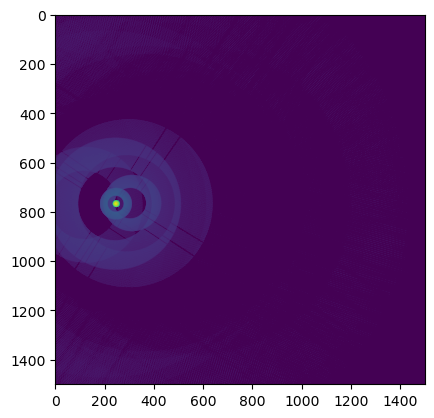

In [36]:
import pylab as plt
plt.imshow(Simu, norm='log')
plt.show()

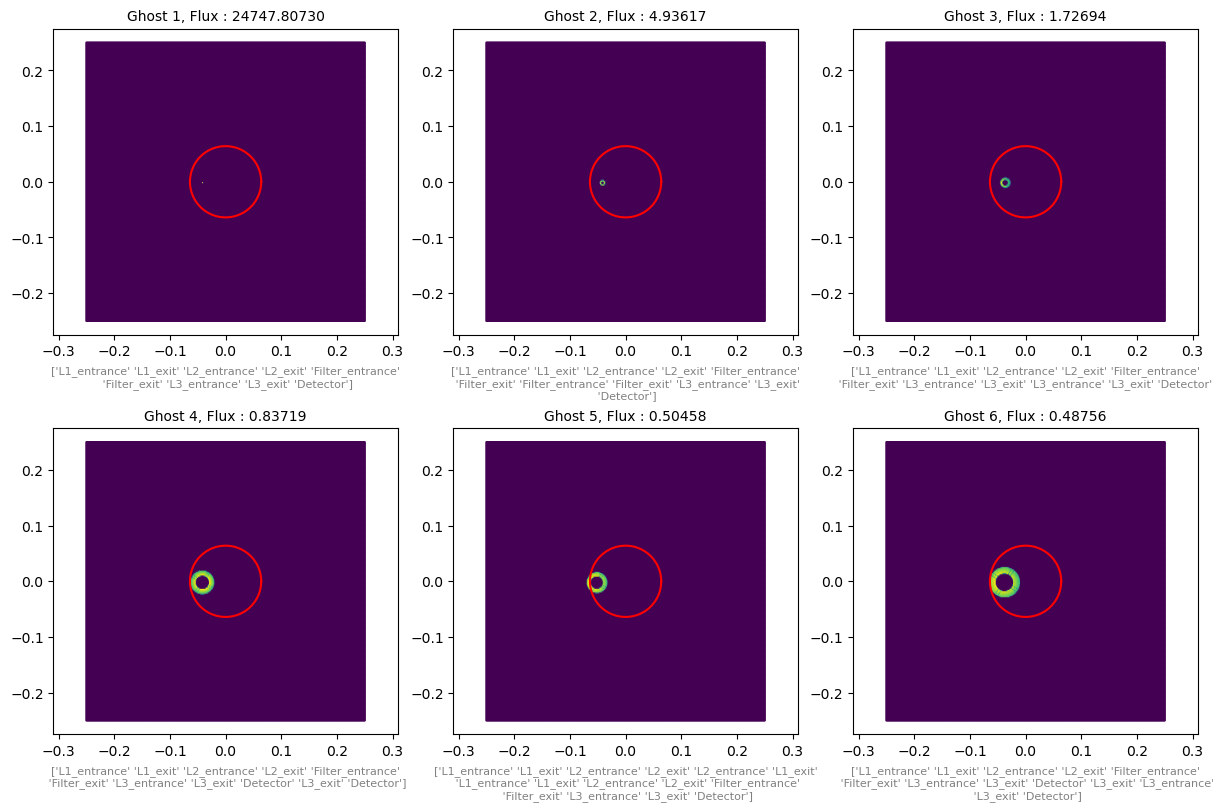

In [37]:
x, y, flux = gsim.getGhosts(ComCam, Params, wavelength, nbghost=5, ghostmap=True)
x, y = gsim.rotAfterBatoid(x, y, 77.89209882814671)

In [38]:
Simu = gsim.getSimuImage(1500, 1500, x, y, flux, binning=8.0)

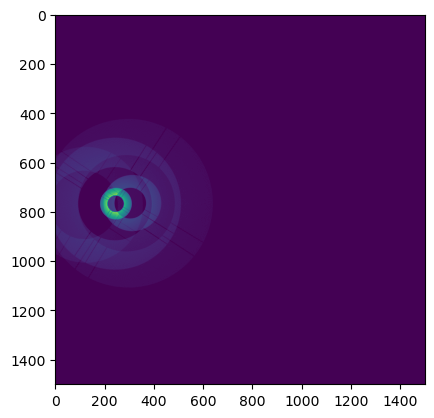

In [39]:
plt.imshow(Simu)
plt.show()